# Prediction of Wildfires for Optimization of Prescribed Burns in British Columbia
**_Allan Go_**    
02/2022

## Abstract <br>
<div style="text-align: justify"> With increasing impacts of wildfires in British Columbia, machine learning techniques may see increased uses in optimizing prescribed burns. In exploring data science workflows I have demonstrated _____________________________(tbd)______________________________  for wildfire prediction. Accuracte predictions of wildfires in populated regions can lead to data informed controlled burns and optimized modelling to reduce risk to human and environmental ecosystems. </div> 

---

## Introduction

### 1.1 Background:
In recent years British Columbia (BC) has seen record breaking wildfire seasons (Bregolisse, 2018). A vareity of techniques exist to aid in minimization of risk to human life and sensitive ecosystems. Some of these techniques include satellite imaging, fire towers, reactive wildfire fighting, and proactive wildfire fighting techniques such as prescribed burns. Recently, news outlets and indigenous communities have called for increased usage of prescribed burns to manage our forest ecosystems and preemptively reduce the severity of uncontrolled wildfires (Owen, 2021). This technique of selectively burning regions of forest has a long history in promoting healthy sustainable ecosystems while reducing uncontrolled wildfire severity. Additionally, increased usage of machine learning  (ML) has led to applications in wildfire fuel source prediction, and prediction of wildfires themselves. Typical predictive models use meteorological data, satellite data detecting vegetation and sources of initiation, or other geographic information systems (GIS) (Potera, 2009). By exploring some of these techniques with public data from the BC government, I aim to demonstrate my general data science project workflow while allowing for future modelling of optimal prescribed burn patterns based on predicted BC wildfires. 

### 1.2 Objective:
I aim to model BC Wildfires based on relevant data which will be researched and explored. These may include historical wildfire data, wildfire source initiation, forestry activity data, climate data, or a combination of multiple sources. This model can then be used to simulate controlled burns and allow for preemptive measures to be taken in high risk areas. This project has a secondary aims to provide my overarching process to the data science work flow (though many steps will be abridged or summarized for conciseness). Initially I'll be defining an objective and performing some cursory background research. Next I will find relevant data sources, retrieve and clean them, and perform exploratory data analysis. Next, I will test a few in depth analysis and machine learning models for the prediction of wildfires. This step also has the potential for hypothesis testing the effects of Controlled burns on the severity and number of high risk predicted wildfires. Then I will summarize and provide some visualizations of the data with my conclusion and further notes on future work or iterations.

### 1.3 Limits and Assumptions:
Throughout this project I will attempt to explain any simplifications I have made with respect to the quality of the data, selection of machine learning algorithm, or other aspects of the data science workflow. For example, it would be ideal to try a large variety of ML models, however I have selected three methods based on their general applications and it is likely more optimal models exist. Additionally, I will primarily focus on the prediction of wildfires with minimal exploration into optimizing controlled burn locations and size. In my exploration, after predicting upcoming wildfire perimeters, I will simply select the largest predicted wildfires and assume a controlled burn a percentage of the size of the wildfire to compare effects of prescribed burns to the unaltered model. Wildfire prescribed burns have many factors that are outside the scope of my analysis such as optimal timing, natural weather cycles, and provincial or regional resources available (Chiodi, 2018). 

### 1.4 Resources and Existing Projects:
1. https://storymaps.arcgis.com/stories/bf1223e6a1564ee3933aa0b3641493c1   
    - Machine learning and it's potential for replacing manual wildfire fuel type identification methods. Provides insight into the BC wildfire fuel data source and outlines machine learning predictions for identifying BC fuel sources that may pose higher risk of wildfire.  
    
    
2. https://www2.gov.bc.ca/assets/gov/farming-natural-resources-and-industry/forestry/wildfire-management/fire-fuel-management/bcws_bc_provincial_fuel_type_layer_overview_2015_report.pdf 
    - Description of the wildfire fuel data layer resource.
    
    
3. https://cdnsciencepub.com/doi/full/10.1139/er-2020-0019 
    - Review of machine learning applications in wildfire science and management.
    
    
4. https://www.analyticsvidhya.com/blog/2021/10/forest-fire-prediction-using-machine-learning/ 
    - ML (Random forest regressor) forest fire prediction in North Eastern Australia. One method outlining a ML example for Austrailia will be used for reference for a random forest algorithm. 
    
    
5. https://earthdata.nasa.gov/learn/toolkits/wildfires
    - Resources on the sources, factors contributing to wildfires, and particulate data from wildfires
    

### 1.5 Key Consideration from Literature:
- Humidity and air temperature were found to be accurate predictors for the occurence of extreme wildfires in the contiguous United States based on spatiotemporal Bayesian statistical models (Joseph et al., 2019). The location and time of the wildfire is more difficult to determine. 
- Model sensitivity is highly dependent on the inclusion of vegitation data in addition to meteorological data (Syphard, 2018). I.e. if wildfires occured in previous years there was a lower chance of a wildfire occuring in the same location in future predictive models. This provides useful location information that climate data alone cannot predict. Prediction of vegitation dynamics however can make data unreliable. 


---

## Methods:

### 2. 1 Data Sources:
1. https://www2.gov.bc.ca/gov/content/safety/wildfire-status/about-bcws/wildfire-statistics
- BC Wildfire PSTA Lightning Fire Density
- BC Wildfire PSTA Human Fire Density
- Fire Perimeters - Historical
- Fire Perimeters - Current
2. https://cwfis.cfs.nrcan.gc.ca/ha/nfdb?type=poly&year=9999 (Canadian National Fire Database CNFDB)

### 2.2 Workflow:
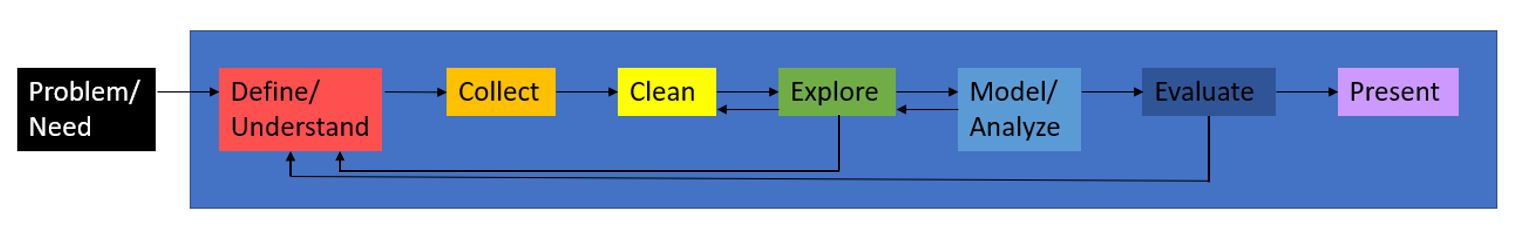

## The Implementation

### 3.1 Setup:
1. Importing Libraries
2. Defining Functions for Plotting and Asthetics

In [9]:
# Import Libraries
import pandas as pd
import numpy as np
import datetime as dt
import geojson

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualisations
%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8,6

In [3]:
# Functions
def plot_histograms(df, variables, n_rows, n_cols):
    fig = plt.figure(figsize = (16,12))
    
    for i, var_name in enumerate(variables):
        ax = fig.add_subplot(n_rows, n_cols, i+1)
        df[var_name].hist(bins = 10, ax = ax)
        ax.set_title('Skew: ' + str(round(float(df[var_name].skew()),))) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels([], visible=False)
        ax.set_yticklabels([], visible=False)
        
    fig.tight_layout()
    plt.show()

def plot_distribution(df, var, target, **kwargs):
    row = kwargs.get('row', None)
    col = kwargs.get('col', None)
    facet = sns.FacetGrid(df, hue = target, aspect = 4, row = row, col = col)
    facet.map(sns.kdeplot, var, shade = True)
    facet.set(xlim=(0, df[var].max()))
    facet.add_legend()

def plot_categories(df, cat, target, **kwargs):
    row = kwargs.get('row', None)
    col = kwargs.get('col', None)
    facet = sns.FacetGrid(df, row = row , col = col)
    facet.map(sns.barplot, cat, target)
    facet.add_legend()

def plot_correlation_map(df):
    corr = titanic.corr()
    _ , ax = plt.subplots(figsize =(12,10))
    cmap = sns.diverging_palette(220, 10, as_cmap = True)
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square = True, 
        cbar_kws = {'shrink' : .9}, 
        ax = ax, 
        annot = True, 
        annot_kws = {'fontsize' : 12 }
    )

def describe_more(df):
    var = [] ; l = [] ; t = []
    
    for x in df:
        var.append(x)
        l.append(len( pd.value_counts(df[x])))
        t.append(df[x].dtypes )
    levels = pd.DataFrame( {'Variable' : var, 'Levels' : l, 'Datatype' : t})
    levels.sort_values(by = 'Levels', inplace = True)
    return levels

def plot_variable_importance(X, y):
    tree = DecisionTreeClassifier(random_state = 99)
    tree.fit(X, y)
    plot_model_var_imp(tree, X, y)
    
def plot_model_var_imp(model, X, y):
    imp = pd.DataFrame( 
        model.feature_importances_, 
        columns = ['Importance'], 
        index = X.columns 
    )
    imp = imp.sort_values(['Importance'], ascending = True )
    imp[:10].plot(kind = 'barh')
    print (model.score(X, y))

### 3.2 Data Cleaning
1. Data was previously downloaded from data source 1. (https://www2.gov.bc.ca/gov/content/safety/wildfire-status/about-bcws/wildfire-statistics)
2. Importing data where I have uploaded it to GitHub
3. Some initial exploration of the data format and variables
4. Cleaning of any irregularities such as empty values

In [7]:
# Import And Explore Data Sets for Relevance/Quality 
hperim = pd.read_csv('HistFirePerimeters.csv') # BC Gov historical wildfire perimeter data
cperim = pd.read_csv('CurFirePerimeters.csv') # BC Gov current wildfire perimeter data
hdensity = pd.read_csv('HumanFireDensity.csv') # BC Gov human source fire density
ldensity = pd.read_csv('LightngFireDensity.csv') # BC Gov lightingning source fire density 

print(hperim.shape, cperim.shape, hdensity.shape, ldensity.shape)
print(hperim.columns, "\n", cperim.columns, "\n", hdensity.columns, "\n", ldensity.columns)
hdensity.head(3)

(22479, 18) (465, 18) (287678, 9) (287457, 9)
Index(['FIRE_NO', 'VERSION_NO', 'FIRE_YEAR', 'FIRE_CAUSE', 'FIRELABEL',
       'SIZE_HA', 'SOURCE', 'TRACK_DATE', 'LOAD_DATE', 'FIRE_DATE', 'METHOD',
       'FCODE', 'SHAPE', 'OBJECTID', 'AREA_SQM', 'FEAT_LEN', 'X', 'Y'],
      dtype='object') 
 Index(['FIRE_NO', 'VERSION_NO', 'FIRE_YEAR', 'SIZE_HA', 'SOURCE', 'TRACK_DATE',
       'LOAD_DATE', 'FIRE_STAT', 'FIRE_NT_ID', 'FIRE_NT_NM', 'FIRE_NT_LK',
       'FCODE', 'AREA_SQM', 'FEAT_LEN', 'SHAPE', 'OBJECTID', 'X', 'Y'],
      dtype='object') 
 Index(['PRT_PHFSDD', 'GRIDCODE', 'FR_STRT_DY', 'FEAT_AREA', 'FEAT_LEN',
       'SHAPE', 'OBJECTID', 'X', 'Y'],
      dtype='object') 
 Index(['PRT_PLFSDD', 'GRIDCODE', 'FR_STRT_DY', 'FEAT_AREA', 'FEAT_LEN',
       'SHAPE', 'OBJECTID', 'X', 'Y'],
      dtype='object')


,PRT_PHFSDD,GRIDCODE,FR_STRT_DY,FEAT_AREA,FEAT_LEN,SHAPE,OBJECTID,X,Y
0,78,-1,Water,20000,600,NaN,1538950,NaN,NaN
1,79,-1,Water,25000,800,NaN,1538951,NaN,NaN
2,80,-1,Water,32500,1000,NaN,1538952,NaN,NaN


In [6]:
hperim.isnull().sum()

FIRE_NO           0
VERSION_NO    17939
FIRE_YEAR         0
FIRE_CAUSE        0
FIRELABEL         0
SIZE_HA           1
SOURCE           78
TRACK_DATE    17759
LOAD_DATE        78
FIRE_DATE         2
METHOD            0
FCODE             0
SHAPE         22479
OBJECTID          0
AREA_SQM          0
FEAT_LEN          0
X             22479
Y             22479
dtype: int64

In [25]:
forest = forest.drop(['X', 'Y', 'SHAPE'], axis=1)

In [26]:
forest.describe()

,VERSION_NO,FIRE_YEAR,SIZE_HA,TRACK_DATE,LOAD_DATE,FIRE_DATE,OBJECTID,AREA_SQM,FEAT_LEN
count,4.540000e+03,22479.000000,22478.000000,4.720000e+03,2.240100e+04,2.247700e+04,2.247900e+04,2.247900e+04,22479.000000
mean,2.013342e+09,1963.073847,687.076804,9.932889e+12,1.989589e+13,1.015729e+11,1.971764e+06,6.869421e+06,7712.008243
std,3.872608e+06,33.557405,5828.203621,1.005251e+13,1.931089e+12,1.428694e+12,6.489310e+03,5.828278e+07,18663.558041
min,2.005053e+09,1917.000000,0.000000,2.003070e+07,2.001101e+07,1.917072e+07,1.960285e+06,4.000000e-03,0.315000
25%,2.009101e+09,1932.000000,11.900000,2.017053e+07,2.007052e+13,1.932093e+07,1.966144e+06,1.195818e+05,1493.974600
50%,2.013562e+09,1957.000000,47.750000,2.020082e+07,2.007052e+13,1.960071e+07,1.971764e+06,4.774064e+05,3175.501300
75%,2.017081e+09,1995.000000,191.500000,2.009111e+13,2.007052e+13,2.004062e+07,1.977384e+06,1.913518e+06,6856.738800
max,2.021033e+09,2020.000000,520885.200000,2.019082e+13,2.021032e+13,2.021033e+13,1.983003e+06,5.208852e+09,832168.640300


### 3.3 Reframe
- the current sources do not seem to provide promise in extrapolating wildfire data from historical data or the density of human and lightning historical causes. Other data sources will now be considered for either vegitation or climate data. 

### 3.4 New Data Sources


In [12]:
with open('PROT_HISTORICAL_FIRE_POLYS_SP.geojson') as f:
    gj = geojson.load(f)
features = gj['features'][0]

features

{"geometry": {"coordinates": [[[-114.909985, 49.621301], [-114.908312, 49.62266], [-114.907266, 49.62334], [-114.906586, 49.623811], [-114.905383, 49.624805], [-114.90486, 49.625171], [-114.90418, 49.625799], [-114.903081, 49.626531], [-114.901826, 49.627211], [-114.900466, 49.628414], [-114.898897, 49.629617], [-114.897276, 49.631186], [-114.89691, 49.631761], [-114.896387, 49.633069], [-114.895654, 49.634429], [-114.895027, 49.635108], [-114.894713, 49.635579], [-114.89419, 49.636311], [-114.893824, 49.636782], [-114.893249, 49.637201], [-114.892673, 49.637514], [-114.891627, 49.638142], [-114.891052, 49.638665], [-114.890058, 49.639973], [-114.889797, 49.640653], [-114.889483, 49.641856], [-114.889326, 49.642954], [-114.889064, 49.643948], [-114.888698, 49.644575], [-114.888123, 49.645151], [-114.887181, 49.645778], [-114.884357, 49.646929], [-114.881585, 49.647975], [-114.879441, 49.649073], [-114.877924, 49.650015], [-114.877244, 49.650695], [-114.876302, 49.651584], [-114.875989,

## Results and Presentation

## Discussion and Conclusion

### References

GovBC, (2010). Wildland fire excellence management strategy. (n.d.). Retrieved February 23, 2022, from https://www2.gov.bc.ca/assets/gov/public-safety-and-emergency-services/wildfire-status/governance/bcws_wildland_fire_mngmt_strategy.pdf 

Chiodi A. M., Larkin N. S., Varner J. Morgan (2018) An analysis of Southeastern US prescribed burn weather windows: seasonal variability and El Niño associations. International Journal of Wildland Fire 27, 176-189.

Shah, S. B., Grübler, T., Krempel, L., Ernst, S., Mauracher, F., & Contractor, S. (2019). REAL-TIME WILDFIRE DETECTION FROM SPACE – A TRADE-OFF BETWEEN SENSOR QUALITY, PHYSICAL LIMITATIONS AND PAYLOAD SIZE. Gottingen: Copernicus GmbH. doi:http://dx.doi.org/10.5194/isprs-archives-XLII-2-W16-209-2019

Brotons, L., Aquilué, N., de Cáceres, M., Fortin, M., & Fall, A. (2013). How fire history, fire suppression practices and climate change affect wildfire regimes in mediterranean landscapes. PLoS One, 8(5) doi:http://dx.doi.org/10.1371/journal.pone.0062392

Owen, B. (2021, July 18). Fire experts prescribe indigenous cultural burns to reduce wildfire risk in B.C. CTVNews. Retrieved February 23, 2022, from https://www.ctvnews.ca/canada/fire-experts-prescribe-indigenous-cultural-burns-to-reduce-wildfire-risk-in-b-c-1.5513720 

Bregolisse, D. M. (2018, October 17). Fighting fire with fire: Forestry experts call for more controlled burning in B.C. Global News. Retrieved February 23, 2022, from https://globalnews.ca/news/4562522/forestry-experts-call-for-more-controlled-burning-in-bc-to-reduce-risk-of-wildfire/ 

Labs, I. (2019, February 16). Top 10 machine learning algorithms and its use cases. Medium. Retrieved February 23, 2022, from https://medium.com/@imaginorlabs/top-10-machine-learning-algorithms-and-its-use-cases-fc303daa2003 

Joseph, M. B., Rossi, M. W., Mietkiewicz, N. P., Mahood, A. L., Cattau, M. E., St. Denis, L. A., Nagy, R. C., Iglesias, V., Abatzoglou, J. T., &amp; Balch, J. K. (2019). Spatiotemporal prediction of wildfire size extremes with bayesian finite sample maxima. Ecological Applications, 29(6). https://doi.org/10.1002/eap.1898 

Syphard, A. D., Sheehan, T., Rustigian-Romsos, H., &amp; Ferschweiler, K. (2018). Mapping future fire probability under climate change: Does vegetation matter? PLOS ONE, 13(8). https://doi.org/10.1371/journal.pone.0201680 

Potera C. (2009). Climate change: challenges of predicting wildfire activity. Environmental health perspectives, 117(7), A293. https://doi.org/10.1289/ehp.117-a293

### Image Citations